In [4]:
%load_ext autoreload
%autoreload 2

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline

# Add the src directory to the path
sys.path.append(os.path.abspath('../src'))
from data_fetcher import fetch_stock_data

# --- Parameters ---
TICKER = "NVDA"
START_DATE = "2025-01-01" 
END_DATE = "2026-02-25"

Failed to read module file 'C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.3312.0_x64__qbz5n2kfra8p0\Lib\re\_casefix.py' for module 're._casefix': UnicodeDecodeError
Traceback (most recent call last):
  File "c:\Users\ekisy\projects\Twitter-Stock-Impact\.venv\Lib\site-packages\IPython\core\extensions.py", line 62, in load_extension
    return self._load_extension(module_str)
           ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
  File "c:\Users\ekisy\projects\Twitter-Stock-Impact\.venv\Lib\site-packages\IPython\core\extensions.py", line 77, in _load_extension
    mod = import_module(module_str)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.3312.0_x64__qbz5n2kfra8p0\Lib\importlib\__init__.py", line 88, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1387, in _gcd_import
  File "<frozen importlib._boot

Fetching data for NVDA...


[*********************100%***********************]  1 of 1 completed


Fetching data for NVDA...


[*********************100%***********************]  1 of 1 completed


Successfully fetched 286 trading days for NVDA.


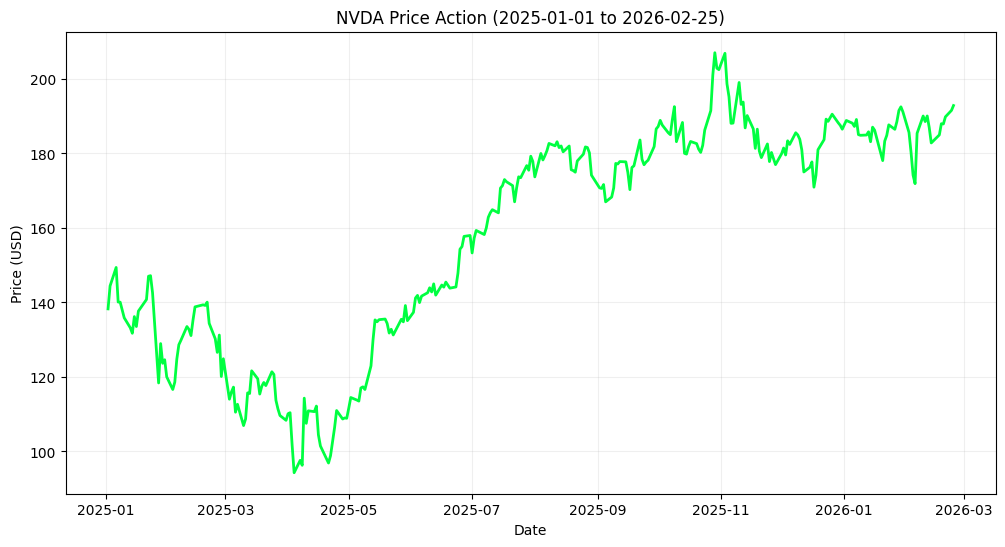

In [5]:
# Fetch Stock Data
nvda_prices = fetch_stock_data(TICKER, START_DATE, END_DATE, interval='1d')

# Clean columns if multi-indexed (common in new yfinance versions)
if isinstance(nvda_prices.columns, pd.MultiIndex):
    nvda_prices.columns = nvda_prices.columns.get_level_values(0)

if not nvda_prices.empty:
    print(f"Successfully fetched {len(nvda_prices)} trading days for {TICKER}.")
    
    # Save raw data
    os.makedirs('../data', exist_ok=True)
    nvda_prices.to_csv('../data/nvda_prices_raw.csv')
    
    # Visual Check
    plt.figure(figsize=(12, 6))
    plt.plot(nvda_prices['Close'], color='#00ff41', linewidth=2)
    plt.title(f'{TICKER} Price Action ({START_DATE} to {END_DATE})')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True, alpha=0.2)
    plt.show()

In [6]:
#Generate Synthetic Data (Pipeline Logic Testing)
# This simulates the Twitter data since API access is restricted
dates = nvda_prices.index.date
data_list = []

pos_templates = ["$NVDA to the moon! AI demand is skyrocketing", "Incredible earnings, Blackwell is a game changer"]
neg_templates = ["$NVDA is looking overvalued", "Concerned about competition from custom AI chips"]

for date in dates:
    daily_volume = np.random.randint(5, 15)
    for _ in range(daily_volume):
        sentiment_type = np.random.choice(['pos', 'neg'], p=[0.6, 0.4])
        text = np.random.choice(pos_templates if sentiment_type == 'pos' else neg_templates)
        data_list.append({
            'timestamp': pd.to_datetime(date),
            'text': text,
            'likes': np.random.randint(10, 500)
        })

synthetic_tweets_df = pd.DataFrame(data_list)
synthetic_tweets_df.to_csv('../data/nvda_tweets_2025.csv', index=False)
print(f"Generated {len(synthetic_tweets_df)} synthetic tweets for simulation.")

Generated 2687 synthetic tweets for simulation.


In [7]:
# FinBERT Model Setup (Deep Learning Inference)
print("Loading FinBERT model...")
model_name = "yiyanghkust/finbert-tone"
try:
    finbert = pipeline("sentiment-analysis", model=model_name, framework="pt")
    # Quick test
    test_res = finbert("Nvidia reports record breaking revenue")[0]
    print(f"AI Model Ready. Test Result: {test_res}")
except Exception as e:
    print(f"Model Load Error: {e}")

Loading FinBERT model...
26-Feb-26 14:50:51 - HTTP Request: HEAD https://huggingface.co/yiyanghkust/finbert-tone/resolve/main/config.json "HTTP/1.1 307 Temporary Redirect"
26-Feb-26 14:50:51 - HTTP Request: HEAD https://huggingface.co/api/resolve-cache/models/yiyanghkust/finbert-tone/4921590d3c0c3832c0efea24c8381ce0bda7844b/config.json "HTTP/1.1 200 OK"
Model Load Error: Unrecognized model in yiyanghkust/finbert-tone. Should have a `model_type` key in its config.json.


In [ ]:
# Load Final Analyzed Data (The Result from Colab)
# Since we processed the full dataset on GPU in Colab, we load it here for final reporting
try:
    processed_path = '../data/nvda_processed_final.csv'
    final_data = pd.read_csv(processed_path, index_col=0)
    final_data.index = pd.to_datetime(final_data.index)
    
    print("\n--- Final Project Summary ---")
    print(f"Total trading days analyzed: {len(final_data)}")
    print(f"Date Range: {final_data.index.min().date()} to {final_data.index.max().date()}")
    display(final_data.head())
except FileNotFoundError:
    print("Warning: processed file not found. Ensure you've moved the Colab output to ../data/")


--- Final Project Summary ---
Total trading days analyzed: 287
Date Range: 2025-01-02 to 2026-02-25


,price,sentiment,sentiment_lag_1
2025-01-02,138.272171,0.003845,NaN
2025-01-03,144.430496,0.038689,0.003845
2025-01-06,149.389130,0.365430,0.038689
2025-01-07,140.101669,0.221735,0.365430
2025-01-08,140.071701,0.079611,0.221735
